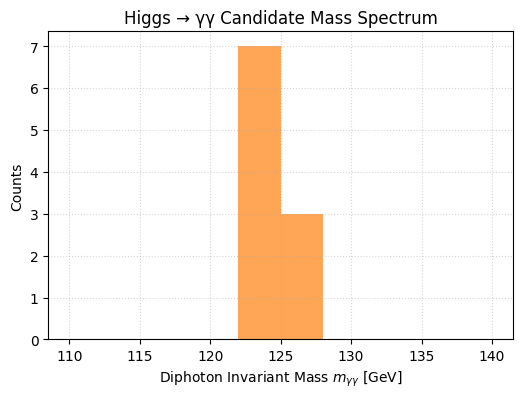

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

fig_dir = "../figures"
os.makedirs(fig_dir, exist_ok=True)

csv_path = "../data/diphoton.csv"
df = pd.read_csv(csv_path)


masses = df["M"]


plt.figure(figsize=(6,4))
plt.hist(
    masses,
    bins=10,
    range=(110, 140),
    histtype="stepfilled",
    alpha=0.7,
    color="C1"
)
plt.xlabel("Diphoton Invariant Mass $m_{γγ}$ [GeV]")
plt.ylabel("Counts")
plt.title("Higgs → γγ Candidate Mass Spectrum")
plt.grid(linestyle=":", alpha=0.5)


out_path = os.path.join(fig_dir, "mass_diphoton.png")
plt.savefig(out_path, dpi=150, bbox_inches="tight")
plt.show()
